In [5]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
import numpy as np
import keras
from keras import layers, models


In [6]:
tf.compat.v1.enable_eager_execution()

In [7]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# Define the root directory of your dataset folder
dataset_root = r"D:\Lung_Cancer\chest_CT\data"

In [8]:
#PIL-python library for perform image operations
#tensorflow-for creating neural networks
import PIL
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import numpy as np
from torch.utils.data import DataLoader

# import utils
# import networks
# from plot_utils import plot_summary
# from keras.utils.vis_utils import plot_model

import cv2

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import WeightedRandomSampler

In [9]:
#opening an image in train/lung cancer/1st image
image_lungcancer = PIL.Image.open(r"D:\Lung_Cancer\chest_CT\Data\train\normal\2 - Copy - Copy.png")

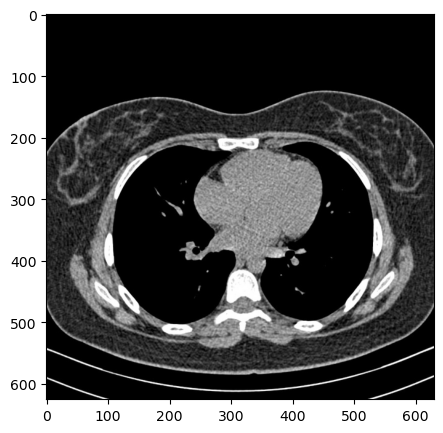

In [10]:

plt.figure(figsize=(5,5))
img = cv2.imread(r"D:\Lung_Cancer\chest_CT\Data\train\normal\2 - Copy (3).png")
plt.imshow(img)
plt.show()

In [11]:
#ImageDataGenerator divides the whole dataset into train,test,val
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
#informing the ImageDataGenerator to load the training_dir for training the data
training_dir =(r"D:\Lung_Cancer\chest_CT\Data\train")
training_generator=ImageDataGenerator(rescale=1/255)
data_train = training_generator.flow_from_directory(training_dir,target_size=(120,120),batch_size=8,class_mode="categorical")

Found 613 images belonging to 4 classes.


In [13]:
testing_dir =(r"D:\Lung_Cancer\chest_CT\Data\test")
testing_generator=ImageDataGenerator(rescale=1/255)
data_test = testing_generator.flow_from_directory(testing_dir,target_size=(120,120),batch_size=8,class_mode="categorical")

Found 315 images belonging to 4 classes.


In [14]:
validation_dir =(r"D:\Lung_Cancer\chest_CT\Data\valid")
validation_generator=ImageDataGenerator(rescale=1/255)
data_val = validation_generator.flow_from_directory(validation_dir,target_size=(120,120),batch_size=8,class_mode="categorical")

Found 72 images belonging to 4 classes.


In [15]:
labels = {value: key for key, value in data_train.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
1 : large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
2 : normal
3 : squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


In [16]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(120,120,3)),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(256,activation="relu"),
                            tf.keras.layers.Dense(4,activation="softmax")
                            ])

In [17]:
model.summary()
model.save('my_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
model.compile(optimizer=tf.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [19]:
history = model.fit(data_train, epochs=20, validation_data=data_val)

Epoch 1/20
77/77 [==============================] - 37s 421ms/step - loss: 1.2641 - accuracy: 0.3393 - val_loss: 1.0469 - val_accuracy: 0.3889
Epoch 2/20
77/77 [==============================] - 27s 352ms/step - loss: 1.0757 - accuracy: 0.4861 - val_loss: 0.9599 - val_accuracy: 0.4722
Epoch 3/20
77/77 [==============================] - 32s 410ms/step - loss: 1.0084 - accuracy: 0.5220 - val_loss: 1.0878 - val_accuracy: 0.3472
Epoch 4/20
77/77 [==============================] - 31s 404ms/step - loss: 0.8830 - accuracy: 0.5987 - val_loss: 0.9575 - val_accuracy: 0.5278
Epoch 5/20
77/77 [==============================] - 30s 395ms/step - loss: 0.8166 - accuracy: 0.5971 - val_loss: 1.1871 - val_accuracy: 0.4722
Epoch 6/20
77/77 [==============================] - 31s 397ms/step - loss: 0.7538 - accuracy: 0.6313 - val_loss: 0.9901 - val_accuracy: 0.4722
Epoch 7/20
77/77 [==============================] - 32s 414ms/step - loss: 0.6624 - accuracy: 0.6819 - val_loss: 0.9909 - val_accuracy: 0.4861

In [20]:
# model=custom_model

In [21]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

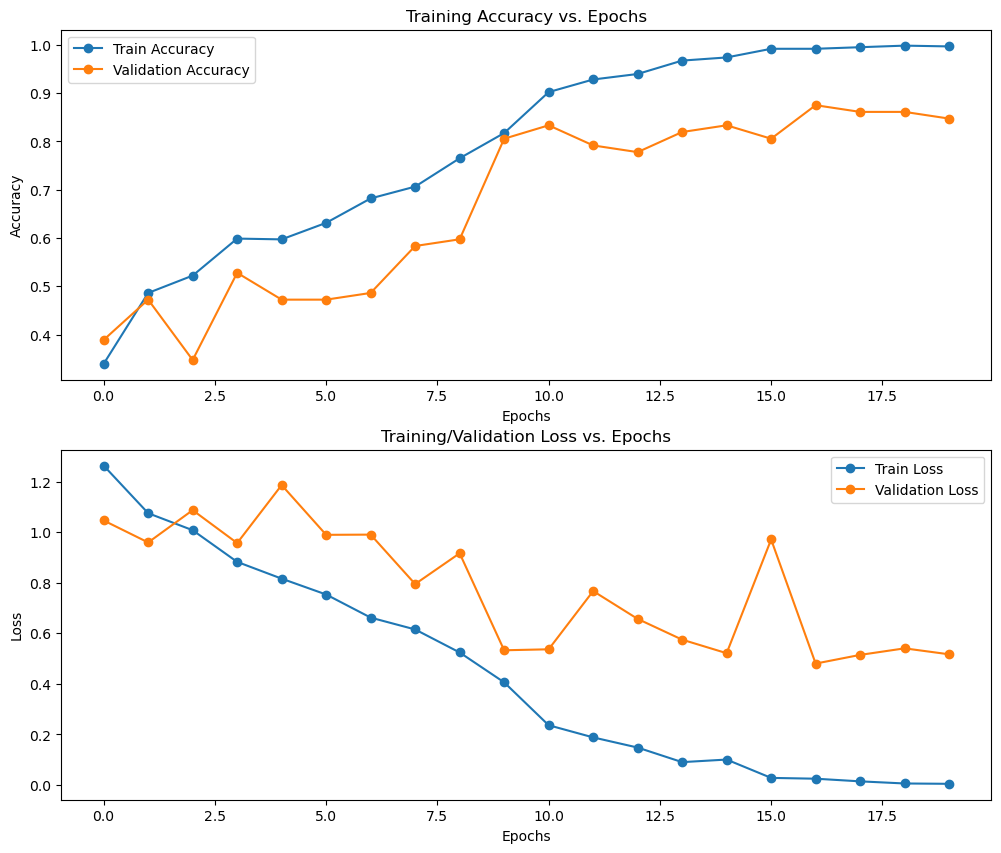

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

In [23]:
#model performs on test data
#model.evaluate(data_test)
test_loss, test_accuracy = model.evaluate(data_test, batch_size=10)
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

40/40 [==============================] - 8s 186ms/step - loss: 1.3390 - accuracy: 0.7683
Test Loss:     1.3390252590179443
Test Accuracy: 0.7682539820671082


In [24]:
predictions = model.predict(data_test)

40/40 [==============================] - 7s 173ms/step


In [25]:
# predictions = custom_model.predict(data_test)

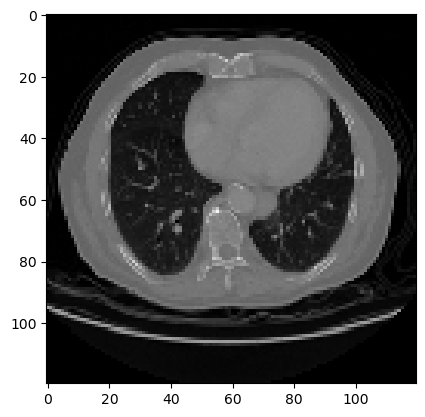

The probability of lung cancer is: [9.9988985e-01 2.2528340e-05 4.1733150e-09 8.7641158e-05]


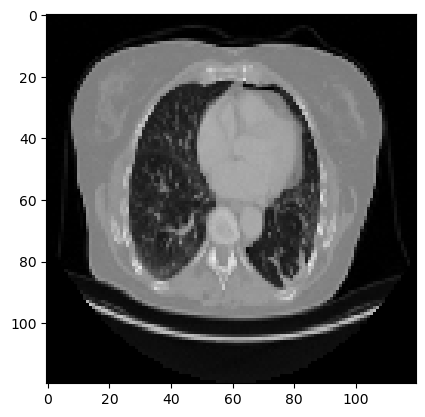

The probability of lung cancer is: [9.9998784e-01 6.8781617e-08 6.7621997e-10 1.2045331e-05]


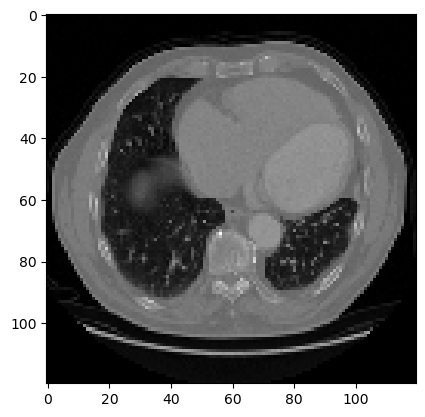

The probability of lung cancer is: [9.2564951e-06 9.9964154e-01 7.1584636e-09 3.4918945e-04]


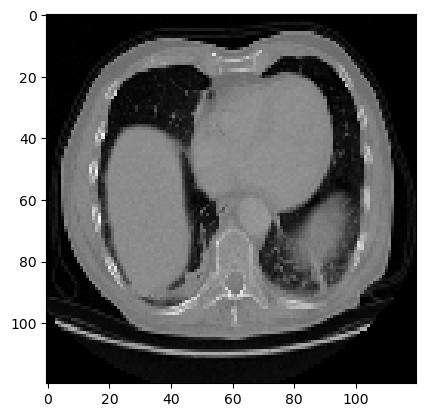

The probability of lung cancer is: [1.8943554e-06 1.7078292e-11 9.9999809e-01 8.8904781e-14]


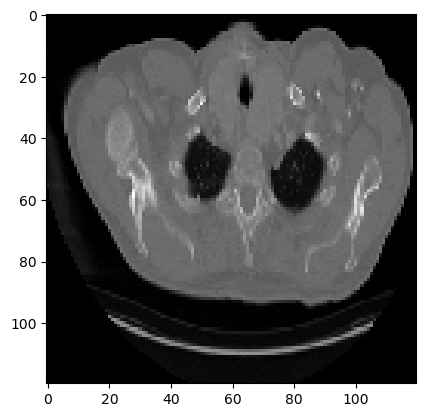

The probability of lung cancer is: [3.2038558e-10 1.0000000e+00 1.4038021e-14 6.7930785e-09]


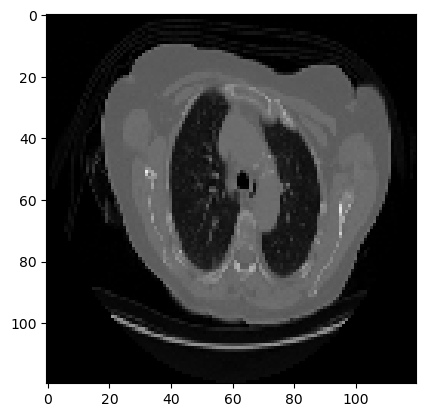

The probability of lung cancer is: [1.4070514e-21 2.2702613e-26 1.0000000e+00 5.0023664e-26]


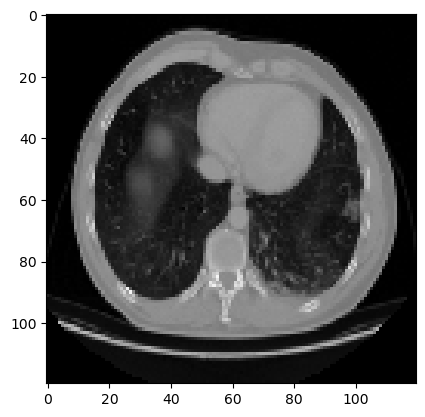

The probability of lung cancer is: [3.7569977e-02 1.7552985e-08 2.2915716e-13 9.6243000e-01]


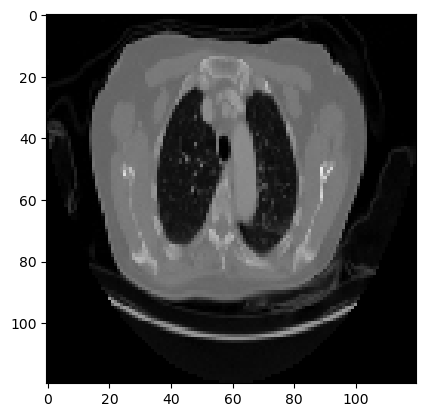

The probability of lung cancer is: [8.2045579e-09 2.4039964e-11 1.0000000e+00 3.1559488e-13]


In [26]:
#range(0,8)=8(since-batch_size is 8)
x=data_test.next()
for i in range(0,1):
    image=x[i]
    for j in range(0,8):
        plt.imshow(image[j])
        plt.show()
        print("The probability of lung cancer is:",predictions[j])

In [27]:
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np

img_path=r"D:\Lung_Cancer\chest_CT\Data\test\normal\8 - Copy (2).png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)
img1 = cv2.imread(img_path)
output = cv2.resize(img1, (224,224))
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

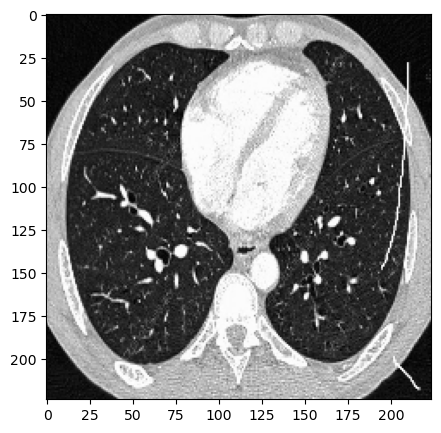

ValueError: in user code:

    File "C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\User\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 120, 120, 3), found shape=(None, 224, 224, 3)


In [28]:
plt.figure(figsize=(5,5))
plt.imshow(output)
plt.show()
predicted=model.predict(img_batch)
for i in range(4):
    if predicted[0][0]==True:
        print("Result: adenocarcinoma")
        break
    elif predicted[0][1]==True:
        print("Result: large.cell.carcinoma")
        break
    elif predicted[0][2]==True:
        print("Result: normal")
        break
    elif predicted[0][3]==True:
        print("Result: squamous.cell.carcinoma")
        break

In [29]:
pip install tf-explain

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [31]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()
            
        

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


#     def compute_heatmap(self, image, eps=1e-8):
#         # construct our gradient model by supplying (1) the inputs
#         # to our pre-trained model, (2) the output of the (presumably)
#         # final 4D layer in the network, and (3) the output of the
#         # softmax activations from the model
#         gradModel = Model(
#             inputs=[self.model.inputs],
#             outputs=[self.model.get_layer(self.layerName).output, self.model.output])

#         # record operations for automatic differentiation
#         with tf.GradientTape() as tape:
#             # cast the image tensor to a float-32 data type, pass the
#             # image through the gradient model, and grab the loss
#             # associated with the specific class index
#             inputs = tf.cast(image, tf.float32)
#             (convOutputs, predictions) = gradModel(inputs)
            
#             loss = predictions[:, tf.argmax(predictions[0])]
    
#         # use automatic differentiation to compute the gradients
#         grads = tape.gradient(loss, convOutputs)

#         # compute the guided gradients
#         castConvOutputs = tf.cast(convOutputs > 0, "float32")
#         castGrads = tf.cast(grads > 0, "float32")
#         guidedGrads = castConvOutputs * castGrads * grads
#         # the convolution and guided gradients have a batch dimension
#         # (which we don't need) so let's grab the volume itself and
#         # discard the batch
#         convOutputs = convOutputs[0]
#         guidedGrads = guidedGrads[0]

#         # compute the average of the gradient values, and using them
#         # as weights, compute the ponderation of the filters with
#         # respect to the weights
#         weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
#         cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

#         # grab the spatial dimensions of the input image and resize
#         # the output class activation map to match the input image
#         # dimensions
#         (w, h) = (image.shape[2], image.shape[1])
#         heatmap = cv2.resize(cam.cpu().numpy(), (w, h))
#         # normalize the heatmap such that all values lie in the range
#         # [0, 1], scale the resulting values to the range [0, 255],
#         # and then convert to an unsigned 8-bit integer
#         numer = heatmap - np.min(heatmap)
#         denom = (heatmap.max() - heatmap.min()) + eps
#         heatmap = numer / denom
#         heatmap = (heatmap * 255).astype("uint8")
#         # return the resulting heatmap to the calling function
#         return heatmap

    def compute_heatmap(self, image, eps=1e-8):
        grad_model = tf.keras.models.Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output]
        )

        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            conv_outputs, predictions = grad_model(inputs)
            loss = predictions[:, self.classIdx]

        grads = tape.gradient(loss, conv_outputs)
        cast_conv_outputs = tf.cast(conv_outputs > 0, "float32")
        cast_grads = tf.cast(grads > 0, "float32")
        guided_grads = cast_conv_outputs * cast_grads * grads

        conv_outputs = conv_outputs[0]
        guided_grads = guided_grads[0]

        weights = tf.reduce_mean(guided_grads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)

        # Perform ReLU and normalization
        cam = tf.nn.relu(cam)
        cam /= tf.reduce_max(cam) + eps

        # Add an extra batch dimension to the heatmap before resizing
        cam_batched = tf.expand_dims(cam, axis=0)

        # Resize the heatmap to match the input image dimensions
        heatmap = tf.image.resize(cam_batched, (image.shape[1], image.shape[2]))

        # Convert the heatmap to a NumPy array
        heatmap_np = heatmap.numpy()

        return heatmap_np
    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [33]:
import numpy as np
from PIL import Image

image_path =r"D:\Lung_Cancer\chest_CT\Data\test\adenocarcinoma\000108 (3).png"
image = Image.open(image_path)
width, height = image.size


# Convert the PIL Image object to a NumPy array
image_np = np.array(image)

# Access the shape of the NumPy array
image_shape = image_np.shape

print("Image shape:", image_shape)


Image shape: (282, 381, 4)


In [56]:
# image = cv2.imread(r"D:\Lung_Cancer\chest_CT\Data\test\adenocarcinoma\000108 (3).png")
# image = cv2.resize(image, (32, 32))
# image = image.astype('float32') / 255
# image = np.expand_dims(image, axis=0)

# preds = model.predict(image) 
# i = np.argmax(preds[0])

import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model in graph mode
# model_path = "my_model.h5"
model = model

# Load and preprocess the image
image_path =r"D:\Lung_Cancer\chest_CT\Data\test\adenocarcinoma\000108 (3).png"
image = Image.open(image_path)
image = image.resize((120, 120))  # Assuming your model expects (224, 224) input size
image = np.array(image)
image = image[:, :, :3]
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

# Make predictions on the image
preds = model.predict(image)
i = np.argmax(preds[0])

# Display the prediction result or use it as needed
print("Predicted class index:", i)


1/1 [==============================] - 0s 75ms/step
Predicted class index: 3


In [57]:
for idx in range(len(model.layers)):
    print(model.get_layer(index = idx).name)


conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4
flatten
dense
dense_1


In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

In [59]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

image = cv2.imread(r"D:\Lung_Cancer\chest_CT\Data\test\adenocarcinoma\000108 (3).png")
image = cv2.resize(image, (120, 120))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0


# Add a batch dimension to the image
# image_batch = np.expand_dims(image, axis=0)

# Assuming you have defined the `GradCAM` class and model creation properly
icam = GradCAM(model, i, 'conv2d_2')
heatmap = icam.compute_heatmap(image_batch)
heatmap = cv2.resize(heatmap, (32, 32))
print(heatmap.shape, image.shape)

heatmap_max = np.max(heatmap)
heatmap_min = np.min(heatmap)
heatmap = (heatmap - heatmap_min) / (heatmap_max - heatmap_min)  # Normalize to [0, 1]
heatmap = (heatmap * 255).astype(np.uint8)  # Scale to [0, 255] and convert to uint8

# Now the heatmap should have values within the [0, 255] range and be of uint8 data type.
# We can apply the color map without issues.
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_VIRIDIS)

# Assuming `image` is already loaded and resized properly
output = cv2.addWeighted(image, 0.5, heatmap, 0.5, 0)


ValueError: Input 0 of layer "model_11" is incompatible with the layer: expected shape=(None, 120, 120, 3), found shape=(1, 1, 120, 120, 3)

TypeError: Invalid shape (32, 32, 26) for image data

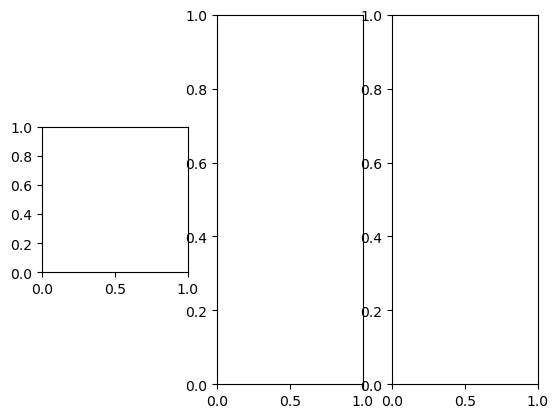

In [53]:
fig, ax = plt.subplots(1, 3)

ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[2].imshow(output)